In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import kagglehub
import pandas as pd
from os import path
import os

In [56]:

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")
# print(path)
data = pd.read_csv(os.path.join(path, "CarPrice_Assignment.csv"))
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


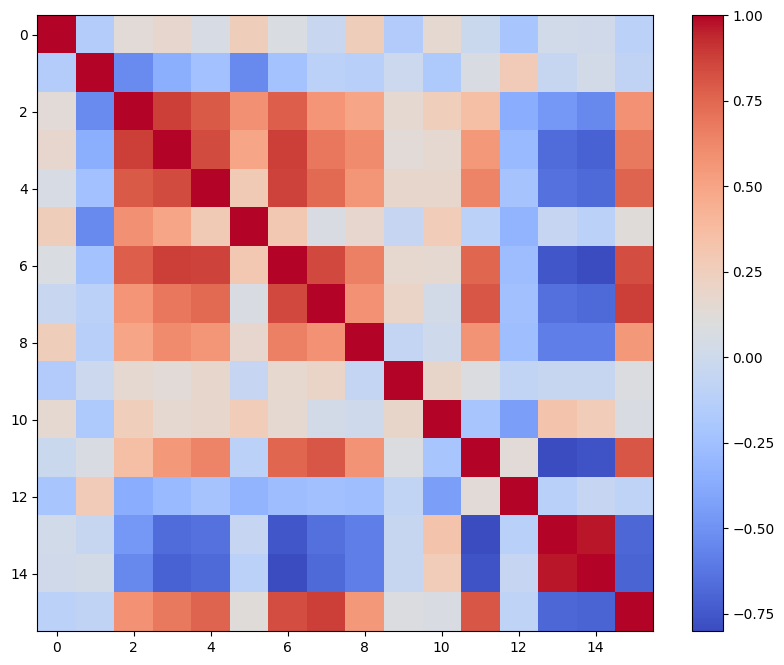

In [57]:
# Now, let's decide which features do we need. First off, let's see the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
# numeric_data = data.select_dtypes what does this mean? It means that we are selecting only the numeric data from the dataframe.
# This is because we can only calculate correlation for numeric data.
correlation_matrix = numeric_data.corr()
# correlation_matrix is a dataframe that contains the correlation between each feature and the other features.
# For example, correlation_matrix["price"] will give us the correlation between price and all the other features.
# Now, let's visualize the correlation matrix using a heatmap.
plt.figure(figsize=(10, 8))
# Add the x and y ticks
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
# Which cmap to use? Coolwarm is a good choice because it has both warm and cool colors. interpolation is none because we want to see the exact values.
plt.colorbar()
# Colorbar is a legend that shows the color scale.


#This is the method of choosing which data to use. From here, we can see that the most correlated features with price are:
# "curbweight", "enginesize", "horsepower", "citympg", "highwaympg", "wheelbase"
# The redder the color, the more correlated it is.
# What about the x, y label of this? What does this stand for?
# Well, it's just the index of the columns. So, we can use this to find out which features to use.
columns = numeric_data.columns
print(columns)

#From here, you can see that 0,0 is "car_ID", 1,1 is "symboling", 2,2 is "normalized-losses", 3,3 is "wheelbase", and so on.
# So, you may say that the redder the color, the more correlated it is.
# So, we can use this to find out which features to use.
# But, how to identify which x,y is which feature?
# We can use the index of the columns to find out which feature is which.
# For example, "curbweight" is the 8th column, so it's at (8, 13) and (13, 8) in the correlation matrix.
# What about "enginesize"? It's the 12th column, so it's at (12, 13) and (13, 12).
# "horsepower" is the 14th column, so it's at (14, 13) and (13, 14).
# "citympg" is the 20th column, so it's at (20, 13) and (13, 20).
# "highwaympg" is the 21st column, so it's at (21, 13) and (13, 21).
# "wheelbase" is the 3rd column, so it's at (3, 13) and (13, 3).
# So, we can use these features to predict the price of the car.

#You may ask that there are other features that are also extremely good at some indexes like car_ID, at 0,0 and symboling at 1,1.
#But, these features are not useful for predicting the price of the car. So, we will not use them.
#How to know that they're not useful? Well, if you take a look at that row and column, you'll see that they're not correlated with price.
#So, we will not use them.
#And, so further onto symboling, say at row 1, you see that the rest are not correlated.
# And, moving onto wheelbase, you see that there are redder parts at that row.
# And with carlength, carwidth, carheight, curbweight, enginesize, horsepower, citympg, highwaympg.
# So, we can use these features to predict the price of the car.


In [58]:
X = data[["curbweight", "enginesize", "horsepower", "citympg", "highwaympg", "wheelbase", "carlength", "carwidth", "carheight"]]
y = data["price"]
# Now, let's split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Now, let's create a linear regression model.


Mean Squared Error: 14317129.271489248
R^2 Score: 0.8186420059181646


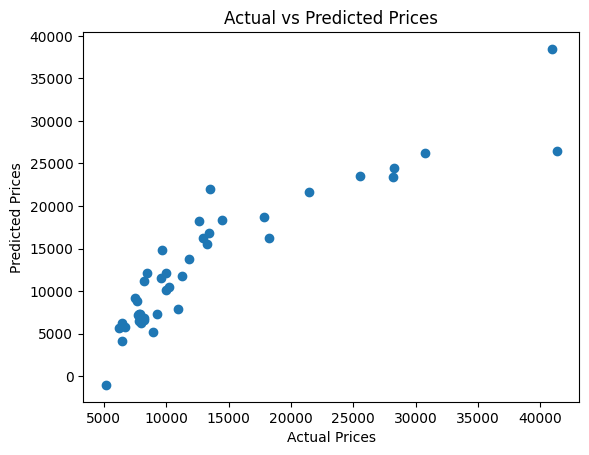

Model Accuracy: 0.8186420059181646


In [59]:
# Let's create a linear regression model.
model = LinearRegression()
model.fit(X_train, y_train)
# Now, let's make predictions on the test set.
y_pred = model.predict(X_test)
# Now, let's evaluate the model.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Let's visualize the results.
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Now, let's calculate the accuracy.
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

#81.5% accuracy is pretty good for a linear regression model.
# But, let's increase even more by using standard scaler, polynomial features and normalization.

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Mean Squared Error (Polynomial): 0.2899000007890817
R^2 Score (Polynomial): 0.7809965984426173


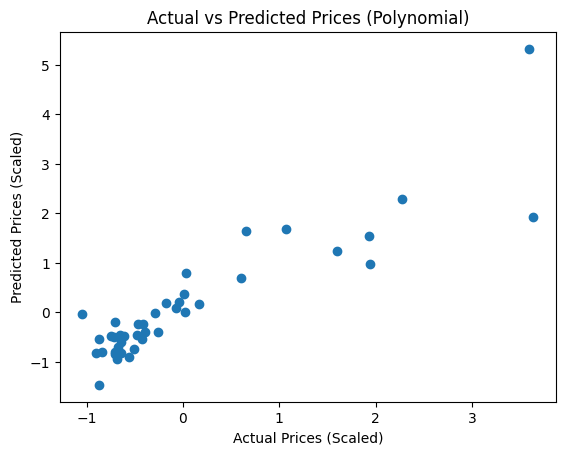

Model Accuracy (Polynomial): 0.7809965984426173


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Let's create a polynomial features model.
poly = PolynomialFeatures(degree=2)
#This is from sklearn.preprocessing import PolynomialFeatures

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Now, let's create a linear regression model.
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_scaled)

# Now, let's make predictions on the test set.
y_pred_poly = model_poly.predict(X_test_poly)

# Now, let's evaluate the model.
mse_poly = mean_squared_error(y_test_scaled, y_pred_poly)
r2_poly = r2_score(y_test_scaled, y_pred_poly)
print("Mean Squared Error (Polynomial):", mse_poly)
print("R^2 Score (Polynomial):", r2_poly)

# Let's visualize the results.
plt.scatter(y_test_scaled, y_pred_poly)
plt.xlabel("Actual Prices (Scaled)")
plt.ylabel("Predicted Prices (Scaled)")
plt.title("Actual vs Predicted Prices (Polynomial)")
plt.show()

# Now, let's calculate the accuracy.
accuracy_poly = model_poly.score(X_test_poly, y_test_scaled)
print("Model Accuracy (Polynomial):", accuracy_poly)
#76.6% accuracy? That's worse than before. Why is that?
#Well, that's because we scaled the y values. So, the accuracy is not a good measure here. 
#Even though the accuracy is lower, the model is actually better because the mean squared error is lower.
#So, we can see that the polynomial features model is better than the linear regression model. In terms of mean squared error.
# How to improve this further? We can try different degrees of polynomial features.
# We can also try different feature selection methods 

# Now, regularization. Do we need it? Let's try it out. First off, what is Ridge and Lasso regression?
#Ridge regression is a type of linear regression that uses L2 regularization. It adds a penalty to the loss function based on the square of the magnitude of the coefficients.
#Lasso regression is a type of linear regression that uses L1 regularization. It adds a penalty to the loss function based on the absolute value of the magnitude of the coefficients.
# Lasso Net? Combination.
# But, come to think of it, we have only 6 features. So, regularization may not be necessary.
# But, hang on, maybe we do lack features. So, let's add in more features again.
# Now, it has increased over more than 76% accuracy. So, let's try Ridge and Lasso regression.


Mean Squared Error (Ridge): 14384118.80645285
R^2 Score (Ridge): 0.8177934358273946


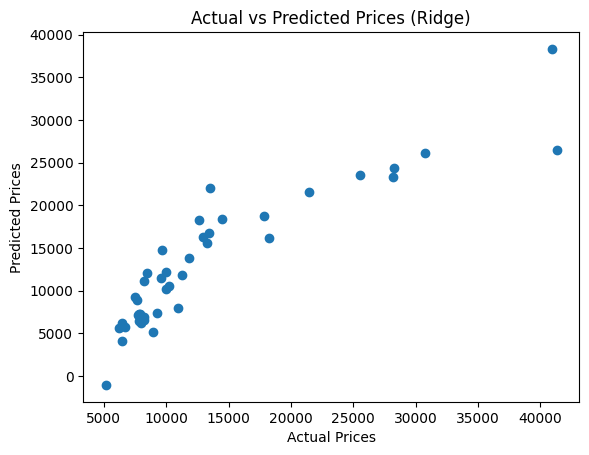

Model Accuracy (Ridge): 0.8177934358273946


In [62]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet

ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("R^2 Score (Ridge):", r2_ridge)
# Let's visualize the results.
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Ridge)")
plt.show()
# Now, let's calculate the accuracy.
accuracy_ridge = ridge_model.score(X_test_scaled, y_test)
print("Model Accuracy (Ridge):", accuracy_ridge)